# **Importing libraries**

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# **Viewing the dataset**

In [114]:
ev_data = pd.read_csv("/content/Electric_Vehicle_Population_Size_History_By_County_.csv")
print(ev_data.columns)
print(ev_data.head())

Index(['Date', 'County', 'State', 'Vehicle Primary Use',
       'Battery Electric Vehicles (BEVs)',
       'Plug-In Hybrid Electric Vehicles (PHEVs)',
       'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total',
       'Total Vehicles', 'Percent Electric Vehicles'],
      dtype='object')
                Date          County State Vehicle Primary Use  \
0  September 30 2022       Riverside    CA           Passenger   
1   December 31 2022  Prince William    VA           Passenger   
2    January 31 2020          Dakota    MN           Passenger   
3       June 30 2022           Ferry    WA               Truck   
4       July 31 2021         Douglas    CO           Passenger   

  Battery Electric Vehicles (BEVs) Plug-In Hybrid Electric Vehicles (PHEVs)  \
0                                7                                        0   
1                                1                                        2   
2                                0                                    

# **Data Cleaning**

**Detecting datatypes**

In [115]:
print(ev_data.dtypes)

Date                                         object
County                                       object
State                                        object
Vehicle Primary Use                          object
Battery Electric Vehicles (BEVs)             object
Plug-In Hybrid Electric Vehicles (PHEVs)     object
Electric Vehicle (EV) Total                  object
Non-Electric Vehicle Total                   object
Total Vehicles                               object
Percent Electric Vehicles                   float64
dtype: object


**Converting data types to proper dtypes and checking for missing values**

In [116]:
list_of_columns_to_change_into_integer = ['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles']
for column_name in list_of_columns_to_change_into_integer:
  ev_data[column_name] = ev_data[column_name].astype(str)
  ev_data[column_name] = ev_data[column_name].str.replace(',', '').astype(float)
  ev_data[column_name] = ev_data[column_name].astype(int)
  print("Missing values in", column_name, ":", ev_data[column_name].isnull().sum())

Missing values in Battery Electric Vehicles (BEVs) : 0
Missing values in Plug-In Hybrid Electric Vehicles (PHEVs) : 0
Missing values in Electric Vehicle (EV) Total : 0
Missing values in Non-Electric Vehicle Total : 0
Missing values in Total Vehicles : 0


In [117]:
ev_data['Date'] = pd.to_datetime(ev_data['Date'], format='%B %d %Y', errors='coerce')
print("Missing values in Date:", ev_data['Date'].isnull().sum())

list_of_columns_to_change_to_categorical = ['County', 'State', 'Vehicle Primary Use']
for column_name in list_of_columns_to_change_to_categorical:
  ev_data[column_name] = ev_data[column_name].astype('category')

print("Missing values in County:", ev_data['County'].isnull().sum())
print("Missing values in State:", ev_data['State'].isnull().sum())
print("Missing values in Vehicle Primary Use:", ev_data['Vehicle Primary Use'].isnull().sum())

Missing values in Date: 0
Missing values in County: 86
Missing values in State: 86
Missing values in Vehicle Primary Use: 0


**Checking dtypes for the final time**

In [118]:
print(ev_data.dtypes)

Date                                        datetime64[ns]
County                                            category
State                                             category
Vehicle Primary Use                               category
Battery Electric Vehicles (BEVs)                     int64
Plug-In Hybrid Electric Vehicles (PHEVs)             int64
Electric Vehicle (EV) Total                          int64
Non-Electric Vehicle Total                           int64
Total Vehicles                                       int64
Percent Electric Vehicles                          float64
dtype: object


**Saving the null data somewhere else**

In [119]:
null_ev_data = ev_data[ev_data.isnull().any(axis=1)]
print(null_ev_data.head())

           Date County State Vehicle Primary Use  \
112  2020-06-30    NaN   NaN           Passenger   
466  2022-01-31    NaN   NaN           Passenger   
526  2023-04-30    NaN   NaN           Passenger   
718  2019-03-31    NaN   NaN           Passenger   
1031 2020-03-31    NaN   NaN           Passenger   

      Battery Electric Vehicles (BEVs)  \
112                                  6   
466                                  5   
526                                  5   
718                                  5   
1031                                 7   

      Plug-In Hybrid Electric Vehicles (PHEVs)  Electric Vehicle (EV) Total  \
112                                          1                            7   
466                                          2                            7   
526                                          0                            5   
718                                          2                            7   
1031                                   

**Dropping the null values from main dataset**

In [120]:
ev_data = ev_data.dropna()
print(ev_data.isnull().sum())

Date                                        0
County                                      0
State                                       0
Vehicle Primary Use                         0
Battery Electric Vehicles (BEVs)            0
Plug-In Hybrid Electric Vehicles (PHEVs)    0
Electric Vehicle (EV) Total                 0
Non-Electric Vehicle Total                  0
Total Vehicles                              0
Percent Electric Vehicles                   0
dtype: int64


# **Exploratory Data Analysis**

### **How much the cars increased with respect to date**

In [121]:
ev_data_wrt_date = ev_data.groupby('Date')[list_of_columns_to_change_into_integer].sum()
print(ev_data_wrt_date.head())

            Battery Electric Vehicles (BEVs)  \
Date                                           
2017-01-31                             14451   
2017-02-28                             14915   
2017-03-31                             15306   
2017-04-30                             15789   
2017-05-31                             16185   

            Plug-In Hybrid Electric Vehicles (PHEVs)  \
Date                                                   
2017-01-31                                      7535   
2017-02-28                                      7730   
2017-03-31                                      7929   
2017-04-30                                      8120   
2017-05-31                                      8330   

            Electric Vehicle (EV) Total  Non-Electric Vehicle Total  \
Date                                                                  
2017-01-31                        21986                     5949763   
2017-02-28                        22645                  

**A chart of EV vs time**

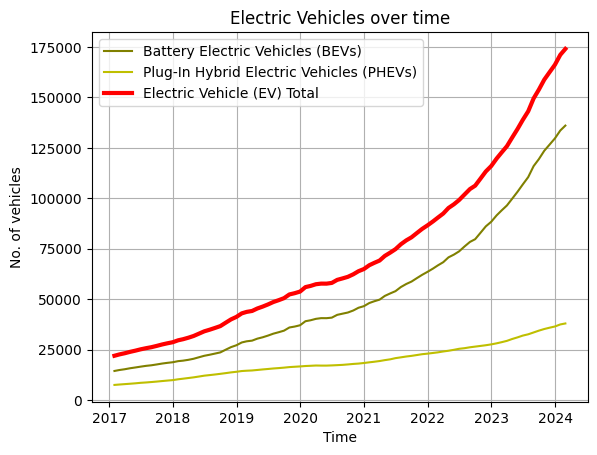

In [122]:
fig, ax1 = plt.subplots()

ax1.plot(ev_data_wrt_date['Battery Electric Vehicles (BEVs)'], color='olive')
ax1.plot(ev_data_wrt_date['Plug-In Hybrid Electric Vehicles (PHEVs)'], color='y')
ax1.plot(ev_data_wrt_date['Electric Vehicle (EV) Total'], color='r', linewidth=3)
ax1.set_xlabel('Time')
ax1.set_ylabel('No. of vehicles')
plt.title('Electric Vehicles over time')
plt.grid()
plt.legend(['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total'])
plt.show()

**A chart of non EV vs time**

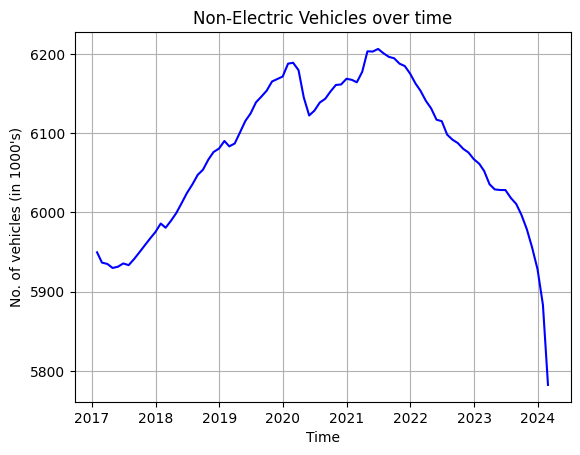

In [123]:
plt.plot(ev_data_wrt_date['Non-Electric Vehicle Total']/1000, color='b')
plt.xlabel('Time')
plt.ylabel("No. of vehicles (in 1000's)")
plt.title('Non-Electric Vehicles over time')
plt.grid()
plt.show()

**EV vs Non EV**

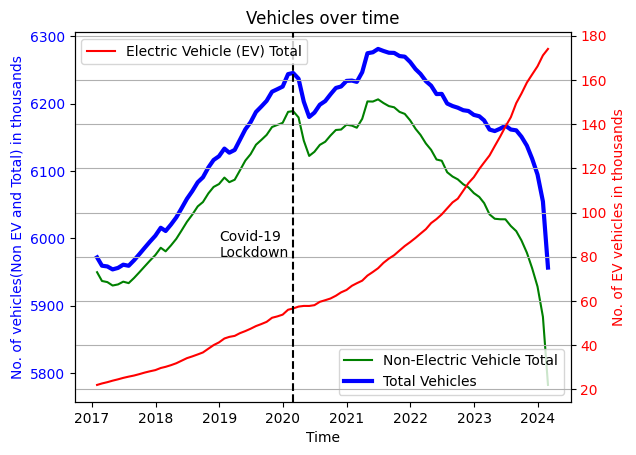

In [124]:
fig, ax1 = plt.subplots()

ax1.plot(ev_data_wrt_date['Non-Electric Vehicle Total']/1000, color='g')
ax1.plot(ev_data_wrt_date['Total Vehicles']/1000, color='b', linewidth=3)
ax1.set_xlabel('Time')
ax1.set_ylabel('No. of vehicles(Non EV and Total) in thousands', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(ev_data_wrt_date['Electric Vehicle (EV) Total']/1000, color='r')
ax2.set_ylabel('No. of EV vehicles in thousands', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Vehicles over time')
plt.axvline(x=pd.to_datetime('2020-03-01'), color='k', linestyle='--')
plt.text(pd.to_datetime('2019-01-01'), 80, 'Covid-19\nLockdown')
plt.grid()
ax1.legend(['Non-Electric Vehicle Total', 'Total Vehicles'], loc='lower right')
ax2.legend(['Electric Vehicle (EV) Total'], loc='upper left')
plt.show()

**Proportion of EV vs Non EV**

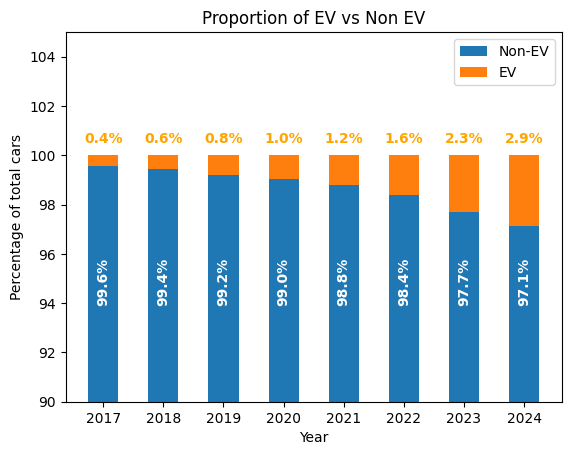

In [125]:
ev_data_wrt_years = ev_data.groupby(pd.Grouper(key='Date', axis=0, freq='1Y'))[list_of_columns_to_change_into_integer].sum()
ev_data_wrt_years['EV_Proportion'] = ev_data_wrt_years['Electric Vehicle (EV) Total']/ev_data_wrt_years['Total Vehicles']
ev_data_wrt_years['Non-EV_Proportion'] = ev_data_wrt_years['Non-Electric Vehicle Total']/ev_data_wrt_years['Total Vehicles']

list_of_years = []

for i in range(2017, 2017+len(ev_data_wrt_years)):
  list_of_years.append(i)

g1 = plt.bar(list_of_years, ev_data_wrt_years['Non-EV_Proportion']*100, width=0.5)
g2 = plt.bar(list_of_years, ev_data_wrt_years['EV_Proportion']*100, width=0.5, bottom=ev_data_wrt_years['Non-EV_Proportion']*100)
plt.ylim(90, 105)
plt.xlabel('Year')
plt.ylabel('Percentage of total cars')
plt.title('Proportion of EV vs Non EV')

i=0
for p in g1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    plt.text(x+width/2,
             94,
             str(round(ev_data_wrt_years['Non-EV_Proportion'][i]*100, 1))+'%',
             ha='center',
             weight='bold',
             color='white',
             rotation='vertical')
    i += 1

j=0
for p in g2:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    plt.text(x+width/2,
             100.5,
             str(round(ev_data_wrt_years['EV_Proportion'][j]*100, 1))+'%',
             ha='center',
             color='orange',
             weight='bold')
    j += 1

plt.legend(['Non-EV', 'EV'])
plt.show()

### **How much the cars increased with respect to area**

**Cars with respect to state**

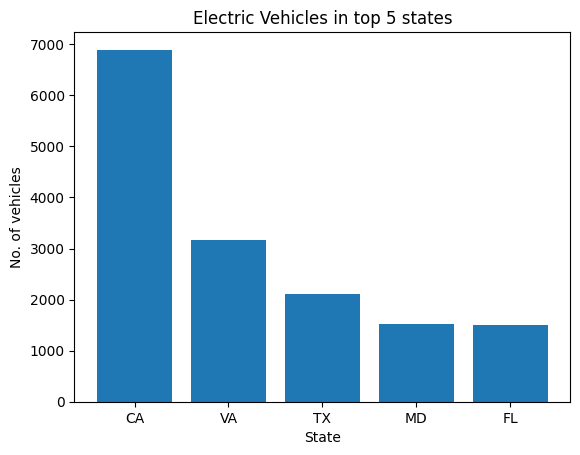

In [126]:
ev_data_wrt_state_ = ev_data.groupby('State')[list_of_columns_to_change_into_integer].sum().sort_values(by='Electric Vehicle (EV) Total', ascending=False)
ev_data_wrt_state_without_wa = ev_data_wrt_state_.drop('WA')

fig, ax = plt.subplots()
ax.bar(ev_data_wrt_state_without_wa.head().index, ev_data_wrt_state_without_wa.head()['Electric Vehicle (EV) Total'])
ax.set_xlabel('State')
ax.set_ylabel('No. of vehicles')
plt.title('Electric Vehicles in top 5 states')
plt.show()

**EV breakdown in Washington as per county**

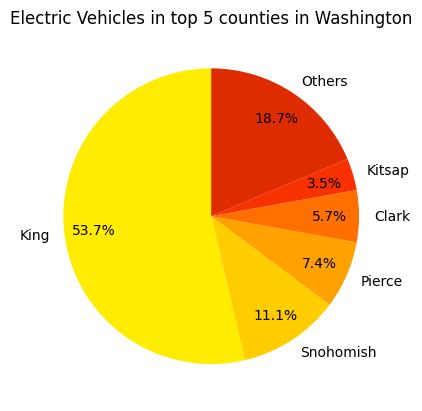

In [127]:
wa_data = ev_data[ev_data['State'] == 'WA'].groupby('County')[list_of_columns_to_change_into_integer].sum().sort_values(by='Electric Vehicle (EV) Total', ascending=False)

other_counties_of_wa = wa_data.drop(list(wa_data.head(5).index), inplace=False).sum()
top_5_counties_of_wa = wa_data.head(5)
top_5_and_others = pd.concat([top_5_counties_of_wa, other_counties_of_wa.to_frame().T])
top_5_and_others.rename(index={0: 'Others'}, inplace=True)

fig, ax = plt.subplots()
color_palette = ['#FFEC00', '#FFCD00', '#FFA200', '#FF7000', '#F73100', '#DE2C00']
ax.pie(top_5_and_others['Electric Vehicle (EV) Total'], labels=top_5_and_others.index, autopct='%1.1f%%', startangle=90, pctdistance=0.8, colors=color_palette)
plt.title('Electric Vehicles in top 5 counties in Washington')
plt.show()

### **How much the cars increased with respect to usage**

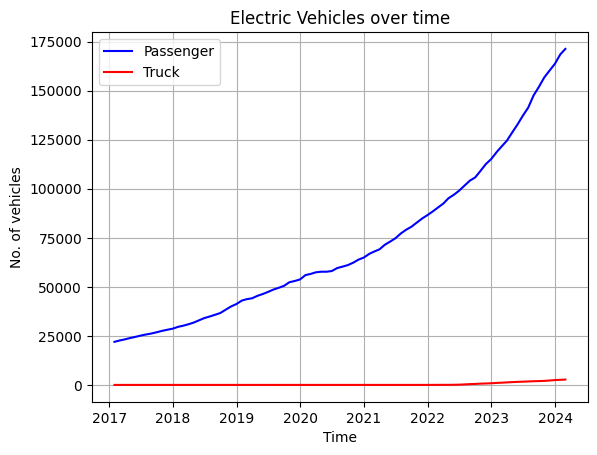

In [137]:
ev_data_wrt_usage_for_passesngers = ev_data[ev_data['Vehicle Primary Use']=='Passenger'].groupby('Date')[list_of_columns_to_change_into_integer].sum()
ev_data_wrt_usage_for_trucks = ev_data[ev_data['Vehicle Primary Use']=='Truck'].groupby('Date')[list_of_columns_to_change_into_integer].sum()

fig, ax = plt.subplots()
ax.plot(ev_data_wrt_usage_for_passesngers['Electric Vehicle (EV) Total'], color='b')
ax.plot(ev_data_wrt_usage_for_trucks['Electric Vehicle (EV) Total'], color='r')
ax.set_xlabel('Time')
ax.set_ylabel('No. of vehicles')
plt.title('Electric Vehicles over time')
plt.grid()
plt.legend(['Passenger', 'Truck'])
plt.show()